In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso
import warnings


In [2]:
df=pd.read_csv('Data/insurance_data.csv')

In [3]:
df.shape

(27, 2)

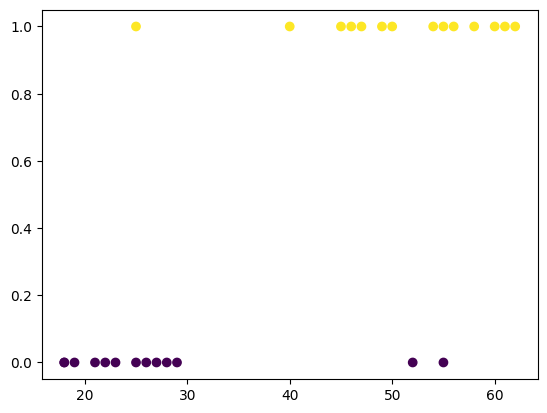

In [4]:
plt.scatter(df['age'],df['bought_insurance'],c=df['bought_insurance'])

In [5]:
x=df['age'].values.reshape(-1,1)
y=df['bought_insurance'].values.reshape(-1,1)

In [6]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [7]:
y_pred=lr.predict(x)

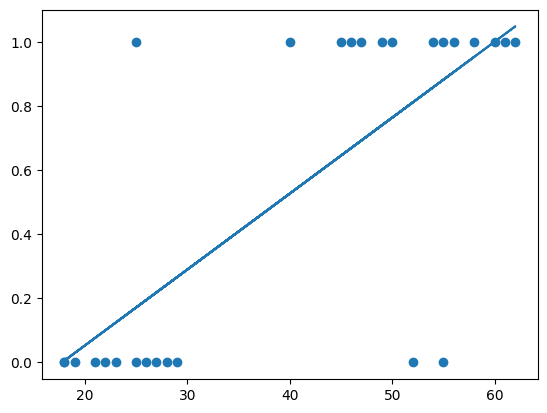

In [8]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [9]:
df=df.drop([3,6,16])
print('shape is :',df.shape)
'''def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

df_clean = remove_outliers_iqr(df, 'age')
'''

shape is : (24, 2)


"def remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df_clean\n\ndf_clean = remove_outliers_iqr(df, 'age')\n"

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9dc9a4390>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9dd6a45d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9dd6482d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9dd6a5cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9dd6a67d0>],
 'means': []}

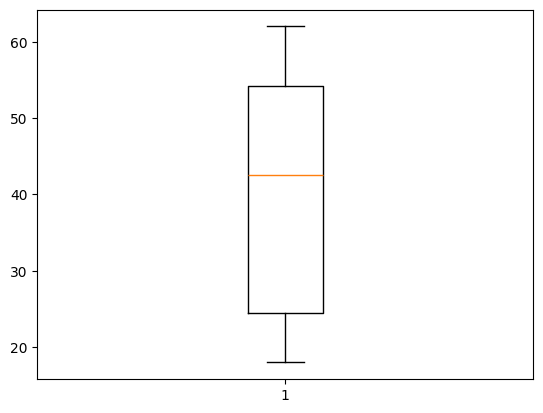

In [10]:
plt.boxplot(df['age'])

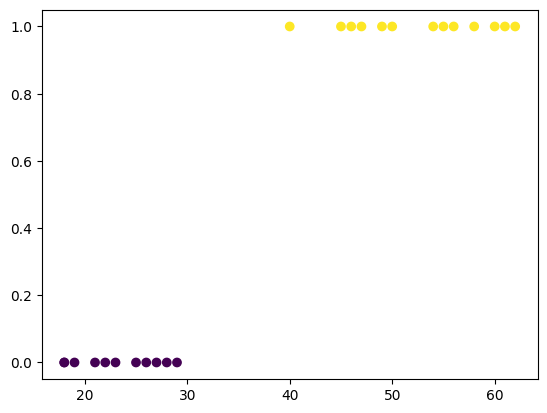

In [11]:
plt.scatter(df['age'],df['bought_insurance'],c=df['bought_insurance'])

In [12]:
new=np.linspace(-10,10,10)
new.shape
new

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

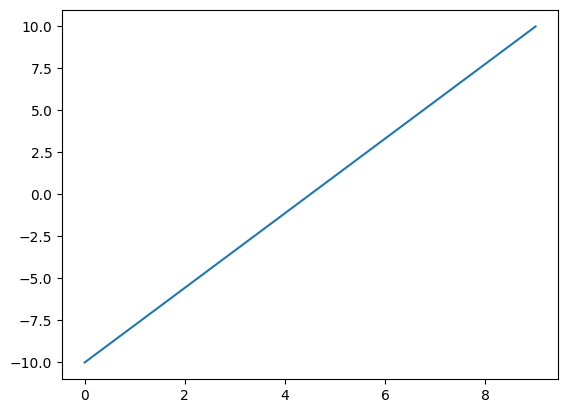

In [13]:
plt.plot(new)

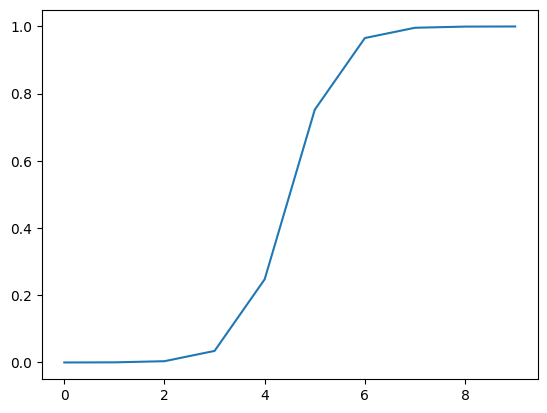

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sig=sigmoid(new)
plt.plot(sig)

In [15]:
outlier = pd.DataFrame({
    'age': [81, 66, 76, 96],
    'bought_insurance': [1, 1, 1, 1]
})
df = pd.concat([df, outlier], ignore_index=True)
df.shape

(28, 2)

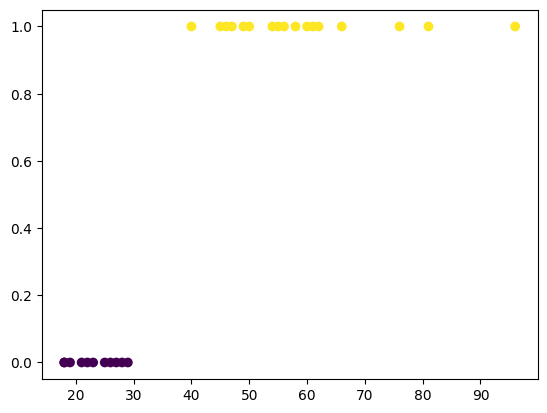

In [16]:
x=df['age'].values.reshape(-1,1)
y=df['bought_insurance'].values.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)
plt.scatter(x,y,c=y)


C:\Users\uday8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


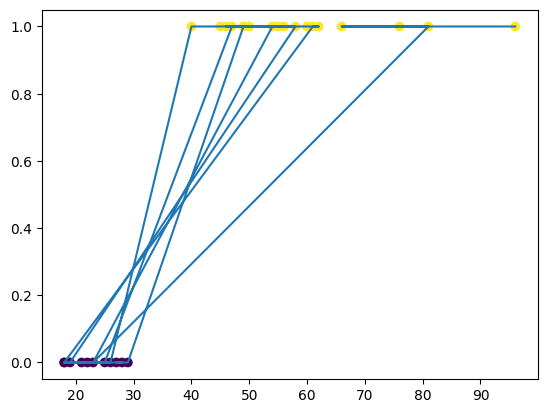

In [17]:
x=df['age'].values.reshape(-1,1)
y=df['bought_insurance'].values.reshape(-1,1)
lr=LogisticRegression()
lr.fit(x,y)
plt.scatter(x,y,c=y)
plt.plot(x,lr.predict(x))